In [61]:
# import relevant dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [62]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [63]:
# assign file paths to the datasets
filepath_city = os.path.join("city_data.csv")
filepath_ride = os.path.join("ride_data.csv")

In [64]:
# load the datasets to dataframes
df_city = pd.read_csv(filepath_city)
df_ride = pd.read_csv(filepath_ride)

In [65]:
# inspect the dataframes
display(df_city.head())
display(df_city.shape)
display(df_city.info())

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


(126, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
city            126 non-null object
driver_count    126 non-null int64
type            126 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


None

In [66]:
# inspect the dataframes
display(df_ride.head())
display(df_ride.shape)
display(df_ride.info())

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


(2375, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


None

In [67]:
# There is information on 125 unique cities in both the datasets
display(df_city['city'].nunique())

125

125

In [68]:
# construct the dataframes
df1 = df_city.groupby(['city','type']).agg({'driver_count':np.sum}).reset_index()
df2 = df_ride.groupby('city').agg({'fare':np.mean}).reset_index()
df3 = df_ride.groupby('city').agg({'ride_id':'count'}).reset_index()

# merge the dataframe
df = pd.merge(df1,df2,how='outer',on='city')
df = pd.merge(df,df3,how='outer',on='city')

In [69]:
df.head()

,city,type,driver_count,fare,ride_id
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


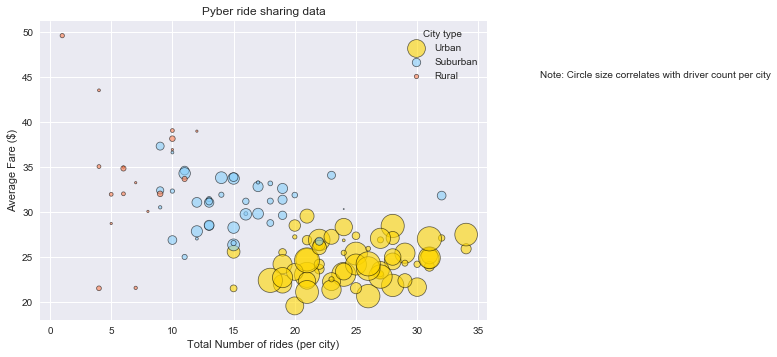

In [70]:
plt.scatter(
        x=df[df['type'] == 'Urban']['ride_id'],
        y=df[df['type'] == 'Urban']['fare'],
        c = '#FFD700',
        s = df[df['type'] == 'Urban']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Urban',
        edgecolors="black",
        linewidths=0.75)

plt.scatter(
        x=df[df['type'] == 'Suburban']['ride_id'],
        y=df[df['type'] == 'Suburban']['fare'],
        c= '#87CEFA',
        s = df[df['type'] == 'Suburban']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Suburban',
        edgecolors="black",
        linewidths=0.75)

plt.scatter(
        x=df[df['type'] == 'Rural']['ride_id'],
        y=df[df['type'] == 'Rural']['fare'],
        c= '#FF7F50',
        s = df[df['type'] == 'Rural']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Rural',
        edgecolors="black",
        linewidths=0.75)

plt.legend( title="City type")
plt.xlabel("Total Number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber ride sharing data")
plt.annotate("Note: Circle size correlates with driver count per city",xy=(35, 45),xytext=(40, 45))
plt.show()

In [71]:
# % of Total Fares by City Type
pie_fare = df.groupby('type').agg({'fare':np.sum}).reset_index().sort_values('type',ascending=False)
pie_fare

,type,fare
2,Urban,1623.863390
1,Suburban,1268.627391
0,Rural,615.728572


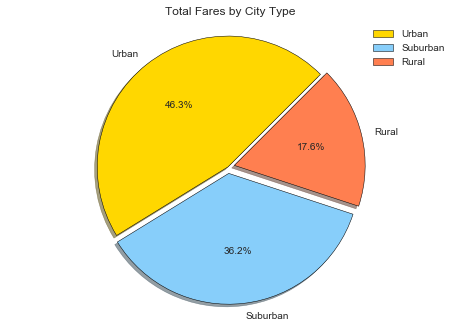

In [72]:
labels = pie_fare['type']
sizes = pie_fare['fare']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Fares by City Type")
plt.legend()
plt.show()

In [73]:
# % of Total Rides by City Type
pie_rides = df.groupby('type').agg({'ride_id':np.sum}).reset_index().sort_values('type',ascending=False)
pie_rides

,type,ride_id
2,Urban,1625
1,Suburban,625
0,Rural,125


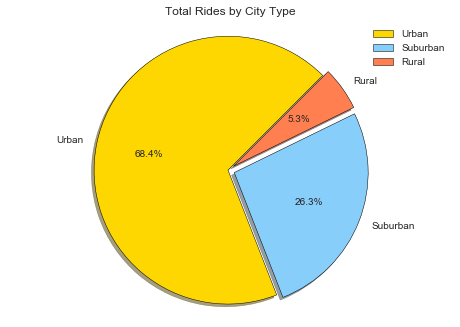

In [74]:
labels = pie_rides['type']
sizes = pie_rides['ride_id']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Rides by City Type")
plt.legend()
plt.show()

In [75]:
# % of Total Drivers by City Type
pie_drivers = df.groupby('type').agg({'driver_count':np.sum}).reset_index().sort_values('type',ascending=False)
pie_drivers

,type,driver_count
2,Urban,2607
1,Suburban,638
0,Rural,104


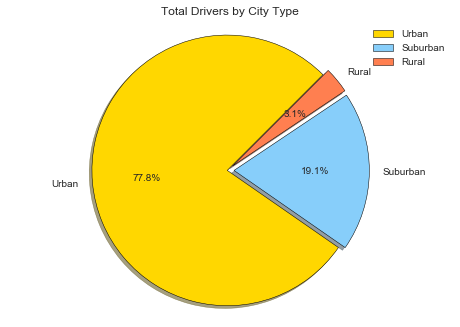

In [76]:
labels = pie_drivers['type']
sizes = pie_drivers['driver_count']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Drivers by City Type")
plt.legend()
plt.show()

In [60]:
#Observable trends
#One can clearly see that, on average, there is a high concentration of drivers in the urban city area compared to the the suburban and rural area.  With this info, we could introduce more public transportation options to city users, like "carpool", without significantly affecting the availability of our other services.

#Looking at the bubble chart, we can also identify a significant difference between the urban areas with lower costs per ride which seem to have fewer riders and those with higher costs per ride which typically have more users.  If we could investigate this further, we might be able to see differences that help us maximize the introduction of our services to cities in the future.

#Despite the low concentration of drivers(3.1%) and rides(5.3%) in the rural area, this area is generating 17.6% of the total fares.  If we can boost the availability of this service, whether through attracting more drivers OR using self-driving cars, we can significantly increase profitability.